In [16]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
import math

In [29]:
def load_data(filename, folder='outputs'):
    with open(f'../{folder}/{filename}', 'r') as f:
        data = json.load(f)
    return data

def roundup(value, base=5):
    """
    Round up a value to the nearest base.
    """
    return math.ceil(value / base) * base

In [30]:
tray_queue_waiting_times = load_data('tray_queue_waiting_times.json', folder='outputs_new_system')
tray_queue_lengths = load_data('tray_queue_lengths.json', folder='outputs_new_system')
xray_queue_waiting_times = load_data('xray_queue_waiting_times.json', folder='outputs_new_system')
xray_queue_lengths = load_data('xray_queue_lengths.json', folder='outputs_new_system')
bodyscreen_entrance_waiting_times = load_data('bodyscreen_entrance_waiting_times.json', folder='outputs_new_system')
bodyscreen_queue_waiting_times = load_data('bodyscreen_queue_waiting_times.json', folder='outputs_new_system')
bodyscreen_waiting_area_count = load_data('bodyscreen_waiting_area_count.json', folder='outputs_new_system')
total_system_times = load_data('total_system_times.json', folder='outputs_new_system')


## Tray Queue Waiting Times

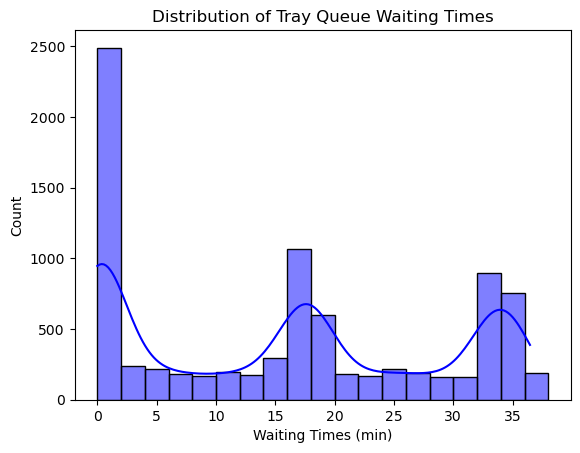

In [31]:
# Extract waiting times
waiting_times = np.array(list(tray_queue_waiting_times.values()))/ 60

max_num = roundup(max(np.array(list(tray_queue_waiting_times.values()))/ 60))

sns.histplot(waiting_times, bins=range(0, max_num, 2), kde=True, color='blue')
plt.xlabel('Waiting Times (min)')
plt.ylabel('Count')
plt.title('Distribution of Tray Queue Waiting Times')
plt.show()

## Xray Queue Waiting Times

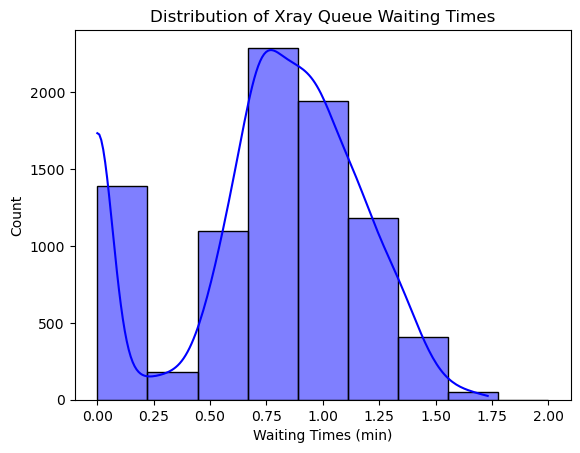

In [32]:
# Extract waiting times
xray_waiting_times = np.array(list(xray_queue_waiting_times.values()))/60

max_num = round(max(np.array(list(xray_queue_waiting_times.values()))/60))
sns.histplot(xray_waiting_times, bins=np.linspace(0, max_num, 10), kde=True, color='blue')
plt.xlabel('Waiting Times (min)')
plt.ylabel('Count')
plt.title('Distribution of Xray Queue Waiting Times')
plt.show()

## Body Screen Waiting Times

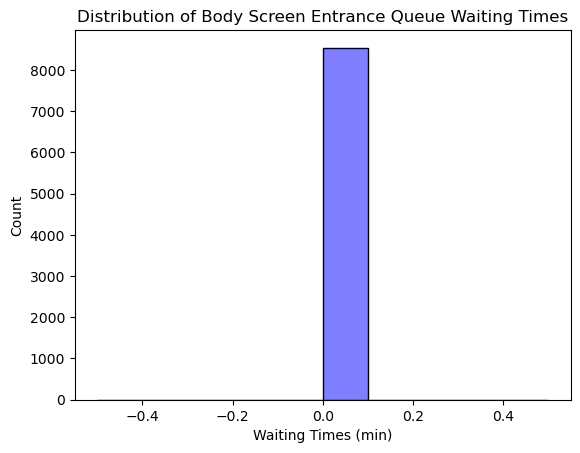

In [33]:
bodyscreen_entrance_waiting_times

# Extract waiting times
bs_entrance_waiting_times = np.array(list(bodyscreen_entrance_waiting_times.values()))/60

max_num = round(max(np.array(list(bodyscreen_entrance_waiting_times.values()))/60))
sns.histplot(bs_entrance_waiting_times, bins=10, kde=True, color='blue')
plt.xlabel('Waiting Times (min)')
plt.ylabel('Count')
plt.title('Distribution of Body Screen Entrance Queue Waiting Times')
plt.show()

## bodyscreen_queue_waiting_times

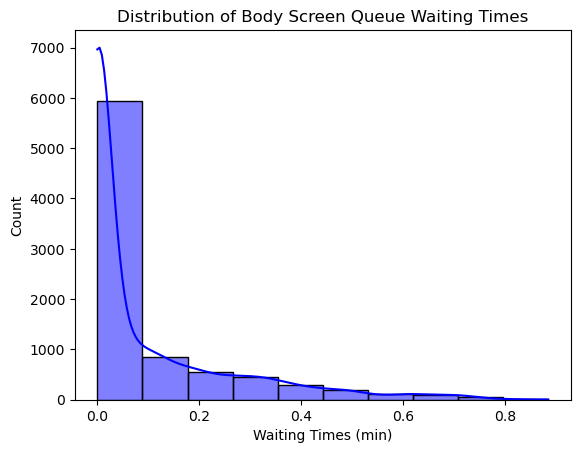

In [34]:
# Extract waiting times
bs_queue_waiting_times = np.array(list(bodyscreen_queue_waiting_times.values()))/60

max_num = round(max(np.array(list(bodyscreen_queue_waiting_times.values()))/60))
sns.histplot(bs_queue_waiting_times, bins=10, kde=True, color='blue')
plt.xlabel('Waiting Times (min)')
plt.ylabel('Count')
plt.title('Distribution of Body Screen Queue Waiting Times')
plt.show()

##  bodyscreen_waiting_area_count

In [35]:
def plot_scatter_time_series(data, title, x_label, y_label):
    lists = sorted(data.items())
    x, y = zip(*lists)
    plt.figure(figsize=(10,6))
    plt.scatter(x, y, alpha=0.4)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

plot_scatter_time_series(bodyscreen_waiting_area_count, 'Body Screen Waiting Area Count', 'Time', 'Count')

KeyboardInterrupt: 

## total_system_times

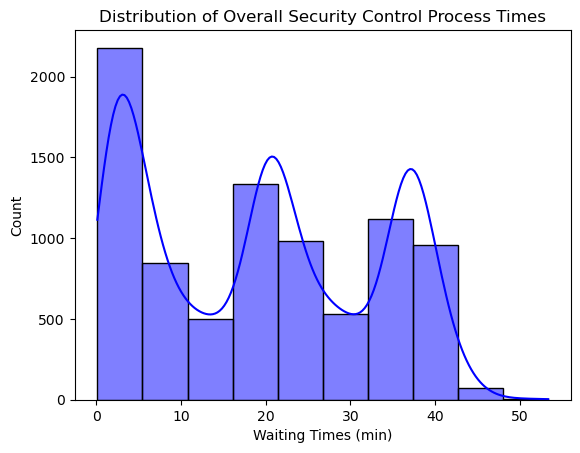

In [36]:
# Extract waiting times
total_system_time_vals = np.array(list(total_system_times.values()))/60

max_num = round(max(np.array(list(total_system_times.values()))/60))
sns.histplot(total_system_time_vals, bins=10, kde=True, color='blue')
plt.xlabel('Waiting Times (min)')
plt.ylabel('Count')
plt.title('Distribution of Overall Security Control Process Times')
plt.show()

# Old System

In [37]:
old_tray_queue_waiting_times = load_data('tray_queue_waiting_times.json')
old_tray_queue_lengths = load_data('tray_queue_lengths.json')
old_xray_queue_waiting_times = load_data('xray_queue_waiting_times.json')
old_xray_queue_lengths = load_data('xray_queue_lengths.json')
old_bodyscreen_entrance_waiting_times = load_data('bodyscreen_entrance_waiting_times.json')
old_bodyscreen_queue_waiting_times = load_data('bodyscreen_queue_waiting_times.json')
old_bodyscreen_waiting_area_count = load_data('bodyscreen_waiting_area_count.json')
old_total_system_times = load_data('total_system_times.json')


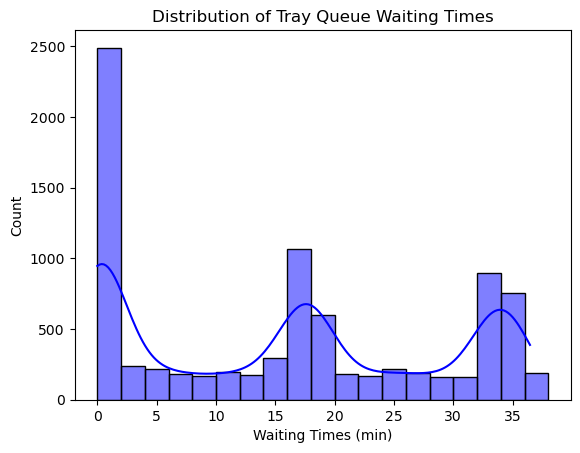

In [38]:
# Extract waiting times
waiting_times = np.array(list(tray_queue_waiting_times.values()))/ 60

max_num = roundup(max(np.array(list(tray_queue_waiting_times.values()))/ 60))

sns.histplot(waiting_times, bins=range(0, max_num, 2), kde=True, color='blue')
plt.xlabel('Waiting Times (min)')
plt.ylabel('Count')
plt.title('Distribution of Tray Queue Waiting Times')
plt.show()

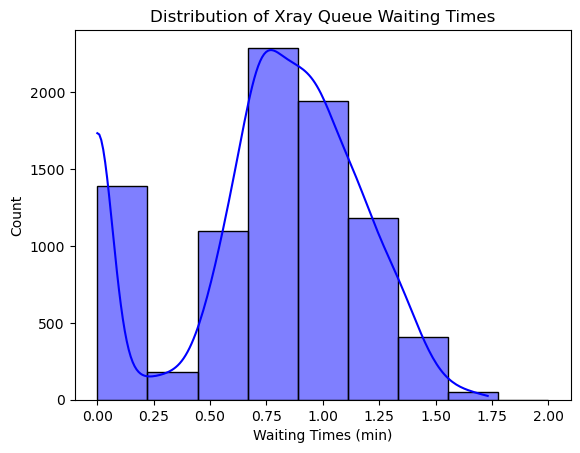

In [39]:
# Extract waiting times
xray_waiting_times = np.array(list(xray_queue_waiting_times.values()))/60

max_num = round(max(np.array(list(xray_queue_waiting_times.values()))/60))
sns.histplot(xray_waiting_times, bins=np.linspace(0, max_num, 10), kde=True, color='blue')
plt.xlabel('Waiting Times (min)')
plt.ylabel('Count')
plt.title('Distribution of Xray Queue Waiting Times')
plt.show()

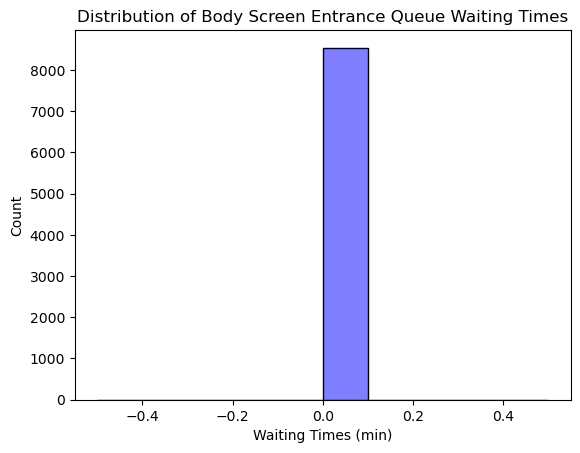

In [40]:
bodyscreen_entrance_waiting_times

# Extract waiting times
bs_entrance_waiting_times = np.array(list(bodyscreen_entrance_waiting_times.values()))/60

max_num = round(max(np.array(list(bodyscreen_entrance_waiting_times.values()))/60))
sns.histplot(bs_entrance_waiting_times, bins=10, kde=True, color='blue')
plt.xlabel('Waiting Times (min)')
plt.ylabel('Count')
plt.title('Distribution of Body Screen Entrance Queue Waiting Times')
plt.show()

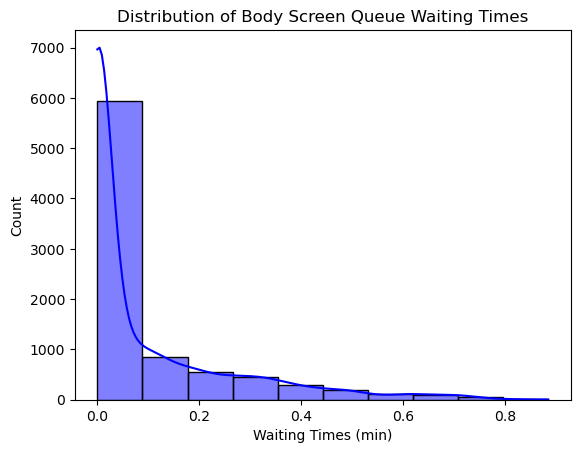

In [41]:
# Extract waiting times
bs_queue_waiting_times = np.array(list(bodyscreen_queue_waiting_times.values()))/60

max_num = round(max(np.array(list(bodyscreen_queue_waiting_times.values()))/60))
sns.histplot(bs_queue_waiting_times, bins=10, kde=True, color='blue')
plt.xlabel('Waiting Times (min)')
plt.ylabel('Count')
plt.title('Distribution of Body Screen Queue Waiting Times')
plt.show()

In [42]:
plot_scatter_time_series(bodyscreen_waiting_area_count, 'Body Screen Waiting Area Count', 'Time', 'Count')

KeyboardInterrupt: 

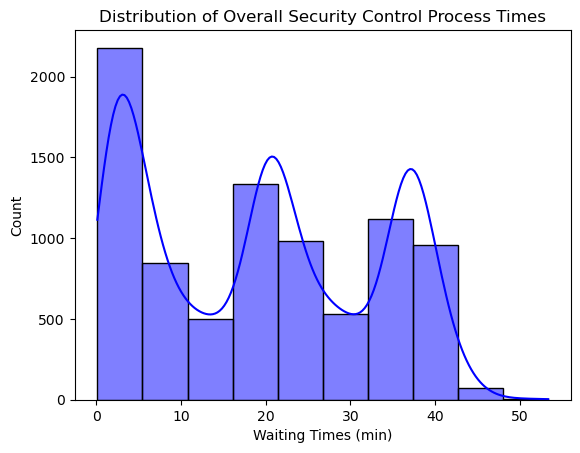

In [43]:
# Extract waiting times
total_system_time_vals = np.array(list(total_system_times.values()))/60

max_num = round(max(np.array(list(total_system_times.values()))/60))
sns.histplot(total_system_time_vals, bins=10, kde=True, color='blue')
plt.xlabel('Waiting Times (min)')
plt.ylabel('Count')
plt.title('Distribution of Overall Security Control Process Times')
plt.show()

# Comparison Bar Plots

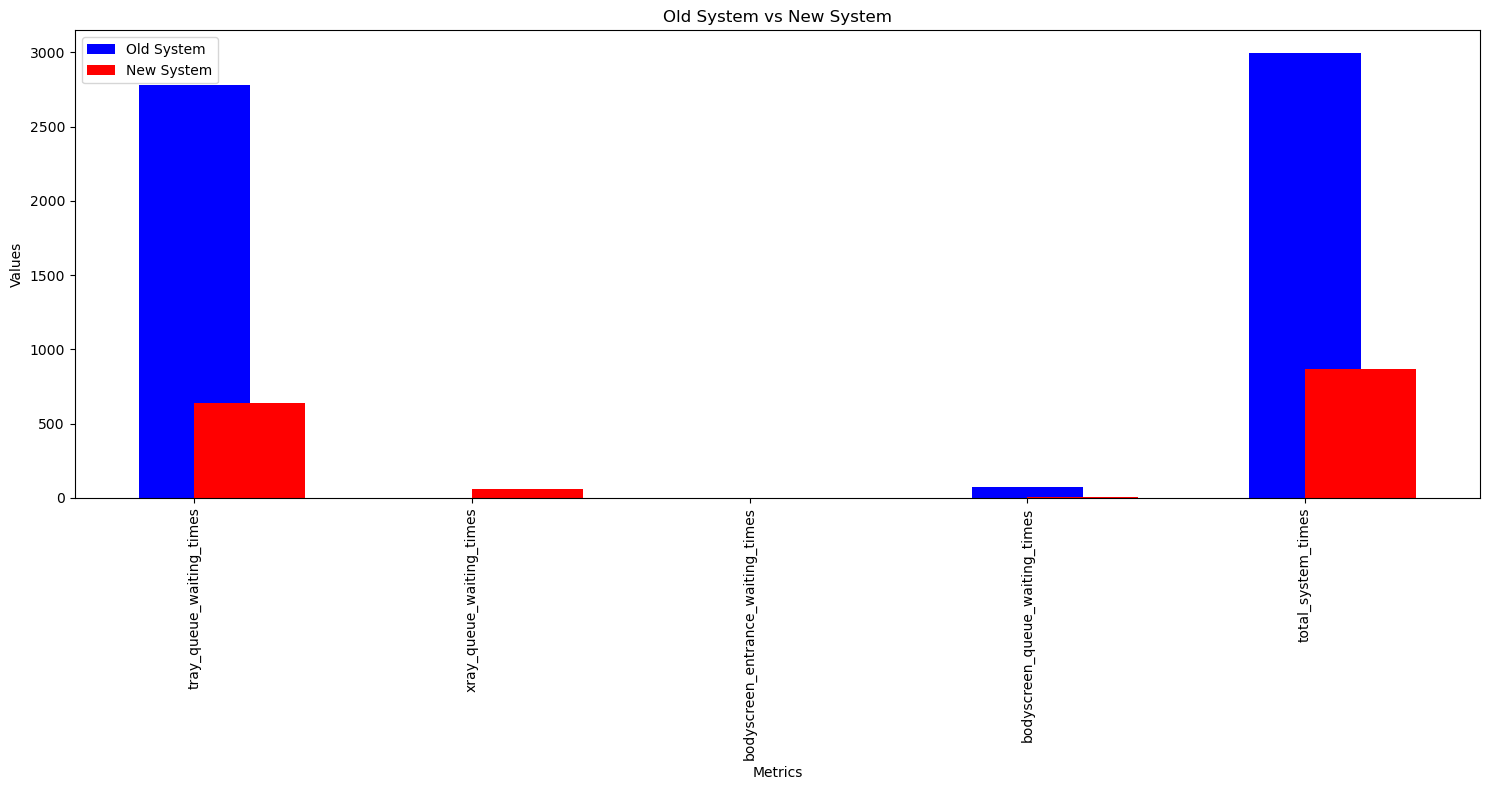

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Your data
old_system = {
    'tray_queue_waiting_times': 2041.77,
    'xray_queue_waiting_times': 0.25,
    'bodyscreen_entrance_waiting_times': 1.03,
    'bodyscreen_queue_waiting_times': 87.47,
    'total_system_times': 2271.30
}

new_system = {
    'tray_queue_waiting_times': 638.88,
    'xray_queue_waiting_times': 57.16,
    'bodyscreen_entrance_waiting_times': 0.00,
    'bodyscreen_queue_waiting_times': 5.72,
    'total_system_times': 866.28
}

# Plot
labels = old_system.keys()
old_values = old_system.values()
new_values = new_system.values()

x = range(len(labels))

plt.figure(figsize=(15, 8))
plt.bar(x, old_values, width=0.4, label='Old System', color='b', align='center')
plt.bar(x, new_values, width=0.4, label='New System', color='r', align='edge')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Old System vs New System')
plt.xticks(x, labels, rotation='vertical')
plt.legend()
plt.tight_layout()
plt.show()


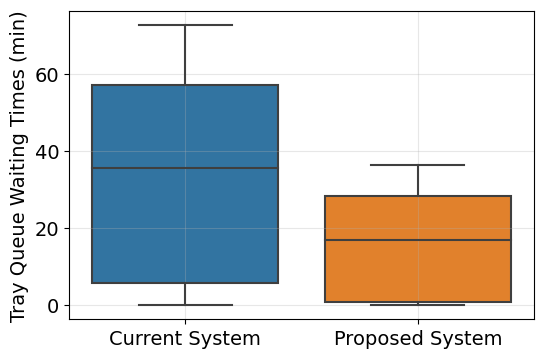

In [50]:
df = pd.DataFrame({
    'Current System': np.array(list(old_tray_queue_waiting_times.values()))/60,
    'Proposed System': np.array(list(tray_queue_waiting_times.values()))/60
})

# Set fontsize
plt.rcParams.update({'font.size': 14})
# Set figure size
plt.figure(figsize=(6, 4))
sns.boxplot(data=df)
plt.ylabel('Tray Queue Waiting Times (min)')
plt.grid(alpha=0.3)
plt.show()

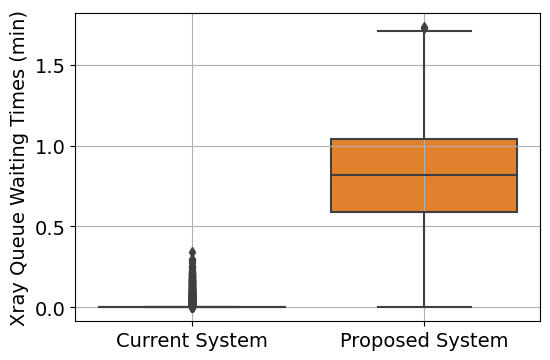

In [52]:
df = pd.DataFrame({
    'Current System': np.array(list(old_xray_queue_waiting_times.values()))/60,
    'Proposed System': np.array(list(xray_queue_waiting_times.values()))/60
})


# Set fontsize
plt.rcParams.update({'font.size': 14})
# Set figure size
plt.figure(figsize=(6, 4))
sns.boxplot(data=df)
plt.ylabel('Xray Queue Waiting Times (min)')
plt.grid()
plt.show()

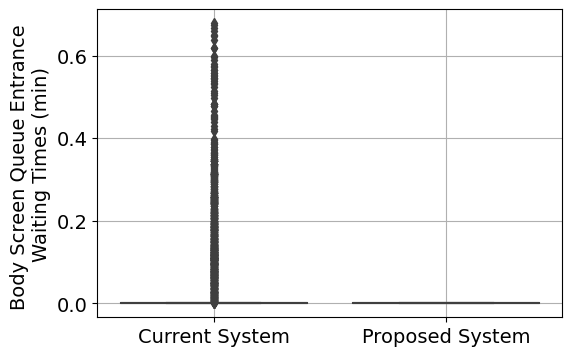

In [54]:
df = pd.DataFrame({
    'Current System': np.array(list(old_bodyscreen_entrance_waiting_times.values()))/60,
    'Proposed System': np.array(list(bodyscreen_entrance_waiting_times.values()))/60
})

# Set fontsize
plt.rcParams.update({'font.size': 14})
# Set figure size
plt.figure(figsize=(6, 4))
sns.boxplot(data=df)
plt.ylabel('Body Screen Queue Entrance \nWaiting Times (min)')
plt.grid()
plt.show()

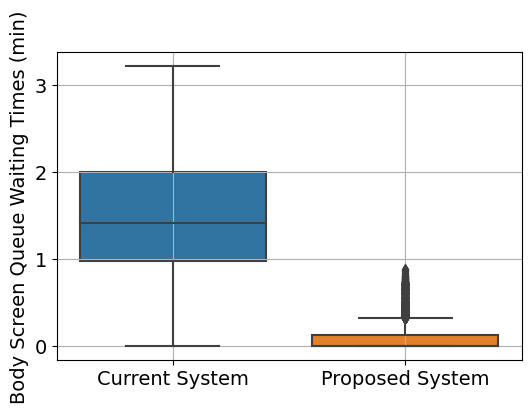

In [55]:
df = pd.DataFrame({
    'Current System': np.array(list(old_bodyscreen_queue_waiting_times.values()))/60,
    'Proposed System': np.array(list(bodyscreen_queue_waiting_times.values()))/60
})

# Set fontsize
plt.rcParams.update({'font.size': 14})
# Set figure size
plt.figure(figsize=(6, 4))
sns.boxplot(data=df)
plt.ylabel('Body Screen Queue Waiting Times (min)')
plt.grid()
plt.show()

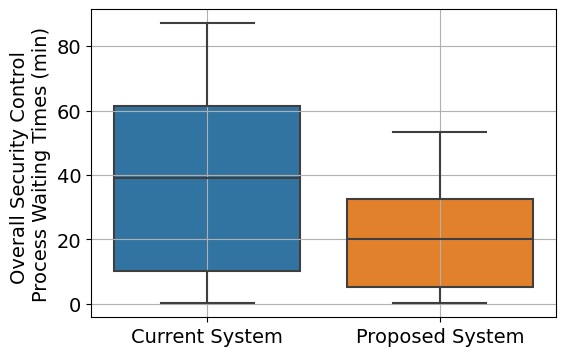

In [57]:
df = pd.DataFrame({
    'Current System': np.array(list(old_total_system_times.values()))/60,
    'Proposed System': np.array(list(total_system_times.values()))/60
})

# Set fontsize
plt.rcParams.update({'font.size': 14})
# Set figure size
plt.figure(figsize=(6, 4))
sns.boxplot(data=df)
plt.ylabel('Overall Security Control \nProcess Waiting Times (min)')
plt.grid()
plt.show()

In [97]:
len(np.array(list(bodyscreen_waiting_area_count.values())))

17300

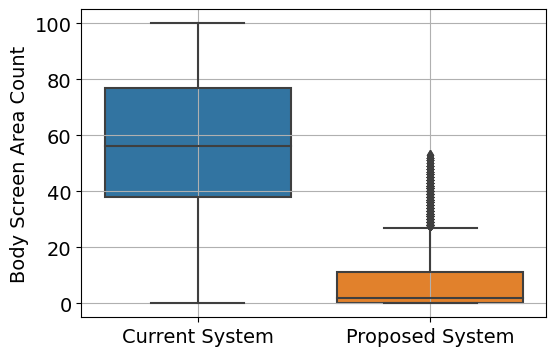

In [58]:
array1 = np.array(list(old_bodyscreen_waiting_area_count.values())).astype(float)
array2 = np.array(list(bodyscreen_waiting_area_count.values())).astype(float)

max_len = max(len(array1), len(array2))
array1 = np.pad(array1, (0, max_len - len(array1)), 'constant', constant_values=np.nan)
array2 = np.pad(array2, (0, max_len - len(array2)), 'constant', constant_values=np.nan)


df = pd.DataFrame({
    'Current System': array1,
    'Proposed System': array2
}, )

# Set fontsize
plt.rcParams.update({'font.size': 14})
# Set figure size
plt.figure(figsize=(6, 4))
sns.boxplot(data=df)
plt.ylabel('Body Screen Area Count')
plt.grid()
plt.show()